# Statistical analysis of the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

accMed_knn_df=pd.read_csv('datasets/acc_media_knn.csv')
display(accMed_knn_df.head())
accMed_svm_df=pd.read_csv('datasets/acc_media_svm.csv')
display(accMed_svm_df.head())
accYol_knn_df=pd.read_csv('datasets/acc_yolo_knn.csv')
display(accYol_knn_df.head())
accYol_svm_df=pd.read_csv('datasets/acc_yolo_svm.csv')
display(accYol_svm_df.head())

,rs,acc_train,acc_test,cf_report,conf_matrix
0,0,0.588535,0.436548,precision recall f1-score ...,[[ 2 6 3 4 4 3 6]\n [ 1 3 7 3 3 4 ...
1,1,0.575796,0.477157,precision recall f1-score ...,[[ 5 2 5 1 2 5 7]\n [ 5 4 4 0 1 4 ...
2,2,0.557962,0.538071,precision recall f1-score ...,[[ 7 2 3 3 4 5 4]\n [ 6 6 4 2 1 6 ...
3,3,0.545223,0.532995,precision recall f1-score ...,[[ 5 3 5 3 3 5 4]\n [ 5 9 1 2 3 3 ...
4,4,0.557962,0.527919,precision recall f1-score ...,[[ 5 4 6 3 6 0 4]\n [ 4 9 3 0 4 5 ...


,rs,acc_train,acc_test,cf_report,conf_matrix
0,0,0.694268,0.426396,precision recall f1-score ...,[[ 4 5 4 2 2 6 5]\n [ 2 3 11 1 4 3 ...
1,1,0.700637,0.461929,precision recall f1-score ...,[[ 9 3 6 0 2 4 3]\n [ 5 5 4 2 1 3 ...
2,2,0.704459,0.517766,precision recall f1-score ...,[[ 7 3 2 2 1 9 4]\n [ 4 9 3 2 0 7 ...
3,3,0.696815,0.517766,precision recall f1-score ...,[[ 6 6 3 2 3 5 3]\n [ 6 8 5 1 2 3 ...
4,4,0.701911,0.522843,precision recall f1-score ...,[[ 7 7 5 2 2 1 4]\n [ 6 7 5 1 1 5 ...


,rs,acc_train,acc_test,cf_report,conf_matrix
0,0,0.52375,0.530,precision recall f1-score ...,[[ 8 1 2 2 4 4 8]\n [ 1 8 8 1 2 2 ...
1,1,0.52750,0.470,precision recall f1-score ...,[[ 7 4 1 2 1 7 7]\n [ 5 5 3 5 1 7 ...
2,2,0.55750,0.485,precision recall f1-score ...,[[ 4 3 2 2 4 10 4]\n [ 2 12 2 1 3 3 ...
3,3,0.54875,0.380,precision recall f1-score ...,[[ 4 3 2 1 2 10 7]\n [ 5 5 4 2 1 3 ...
4,4,0.54875,0.480,precision recall f1-score ...,[[ 6 0 1 3 5 11 3]\n [ 5 11 2 2 4 1 ...


,rs,acc_train,acc_test,cf_report,conf_matrix
0,0,0.59875,0.565,precision recall f1-score ...,[[11 2 2 0 4 2 8]\n [ 2 13 6 0 2 0 ...
1,1,0.61625,0.495,precision recall f1-score ...,[[ 7 7 1 1 1 4 8]\n [ 6 8 3 2 2 4 ...
2,2,0.61375,0.475,precision recall f1-score ...,[[ 6 3 3 0 5 8 4]\n [ 4 11 4 0 5 1 ...
3,3,0.60875,0.485,precision recall f1-score ...,[[ 8 7 3 0 1 5 5]\n [ 5 10 4 0 1 3 ...
4,4,0.60500,0.520,precision recall f1-score ...,[[10 1 1 2 4 8 3]\n [ 4 12 3 0 4 2 ...


## Calculate the major statistics

In [59]:
acc = {'knn_media':accMed_knn_df['acc_test'],'knn_yolo': accYol_knn_df['acc_test'],'svm_media': accMed_svm_df['acc_test'], 'svm_yolo': accYol_svm_df['acc_test']}

def ci_interval(value,z):
    se = np.std(value) / np.sqrt(len(value))
    mean = np.mean(value)
    return (mean - z * se),(mean + z * se)


for key, value in acc.items():
    se = np.std(value) / np.sqrt(len(value))
    mean = np.mean(value)
    ci_low,ci_high = ci_interval(value, 2.576)

    print(f'Accuracy of {key}, Mean: {mean:.3f}, Standard Error: {se:.3f}, and CI: {ci_low:.3f}, {ci_high:.3f}')

Accuracy of knn_media, Mean: 0.489, Standard Error: 0.001, and CI: 0.486, 0.493
Accuracy of knn_yolo, Mean: 0.455, Standard Error: 0.001, and CI: 0.451, 0.458
Accuracy of svm_media, Mean: 0.496, Standard Error: 0.001, and CI: 0.493, 0.500
Accuracy of svm_yolo, Mean: 0.491, Standard Error: 0.001, and CI: 0.487, 0.494


<Figure size 1000x700 with 0 Axes>

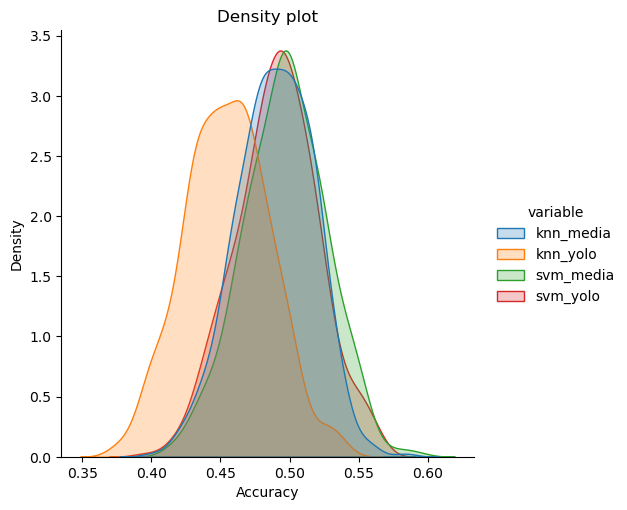

In [40]:
#We now use the 1000 values and plot a density plot to get a sense of whether the distribution of accaracy values differ
df = pd.DataFrame(data=acc)
df['rs']=list(range(0,500))
df_long = pd.melt(df, id_vars=['rs'], value_vars=['knn_media','knn_yolo','svm_media','svm_yolo'])

#Plot the density plots
plt.figure(figsize=(10, 7))
sns.displot(df_long, x="value", hue="variable", kind="kde", fill=True)
plt.title("Density plot")
plt.ylabel("Density")
plt.xlabel("Accuracy")
plt.show()

<Figure size 1000x700 with 0 Axes>

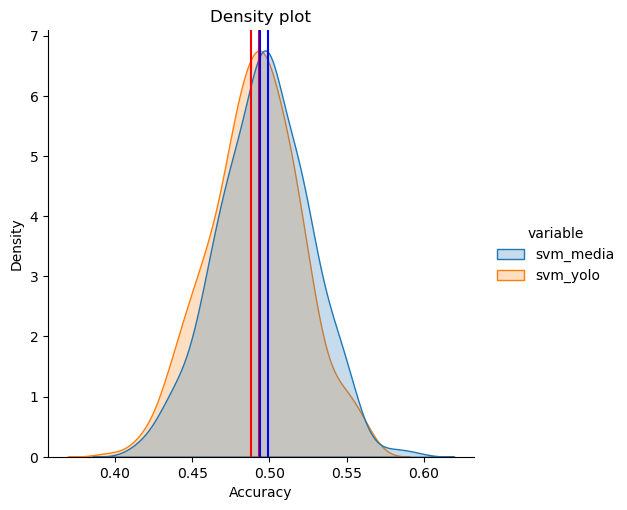

In [68]:
#We now use the 1000 values and plot a density plot to get a sense of whether the distribution of accaracy values differ
df = pd.DataFrame(data=acc)
df['rs']=list(range(0,500))
df_long = pd.melt(df, id_vars=['rs'], value_vars=['svm_media','svm_yolo'])
ci_low_y,ci_high_y = ci_interval(acc['svm_yolo'], 1.96)
ci_low_m,ci_high_m = ci_interval(acc['svm_media'], 1.96)

#Plot the density plots
plt.figure(figsize=(10, 7))
sns.displot(df_long, x="value", hue="variable", kind="kde", fill=True)
plt.axvline(x=ci_low_y, color='red', linestyle='-')
plt.axvline(x=ci_high_y, color='red', linestyle='-')
plt.axvline(x=ci_low_m, color='blue', linestyle='-')
plt.axvline(x=ci_high_m, color='blue', linestyle='-')
plt.title("Density plot")
plt.ylabel("Density")
plt.xlabel("Accuracy")
plt.show()

The knn models are significally different from each other

In [42]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(acc['knn_media'], acc['knn_yolo'],  equal_var=True)
print(f'the t value is: {t_statistic:.3f} and the p_value:{p_value:.3f} ')

the t value is: 18.736 and the p_value:0.000 


The svm models are also significally different from each other

In [39]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(acc['svm_media'], acc['svm_yolo'],  equal_var=True)
print(f'the t value is: {t_statistic:.3f} and the p_value:{p_value:.3f} ')

the t value is: 3.050 and the p_value:0.002 


However The knn media model does not differ in perfomance from the svm_yolo model

In [41]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(acc['knn_media'], acc['svm_yolo'],  equal_var=True)
print(f'the t value is: {t_statistic:.3f} and the p_value:{p_value:.3f} ')

the t value is: -0.682 and the p_value:0.496 
